In [94]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
naver_search = db['30_age_naver_search']
naver_search = naver_search.find()
naver_search= pd.DataFrame(naver_search)
restaurant_df = naver_search[['date','restaurant','cafe']]
leisure_df = naver_search[['date','barge','surfing','snorkeling']]
hocance_df = naver_search[['date','hocance']]

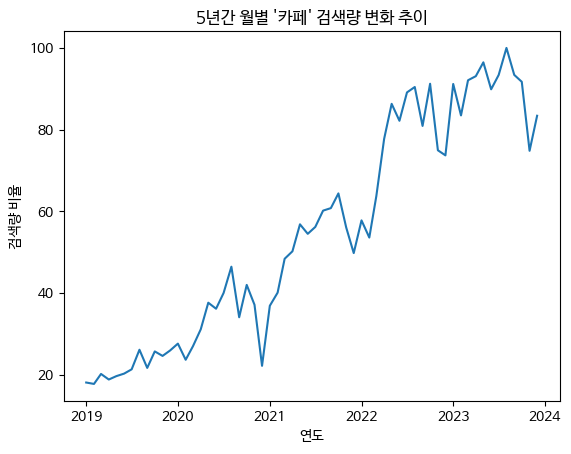

In [95]:
sns.lineplot(data=restaurant_df, x="date", y="cafe")
plt.xlabel("연도")
plt.ylabel("검색량 비율")
plt.title("5년간 월별 '카페' 검색량 변화 추이")
plt.show()

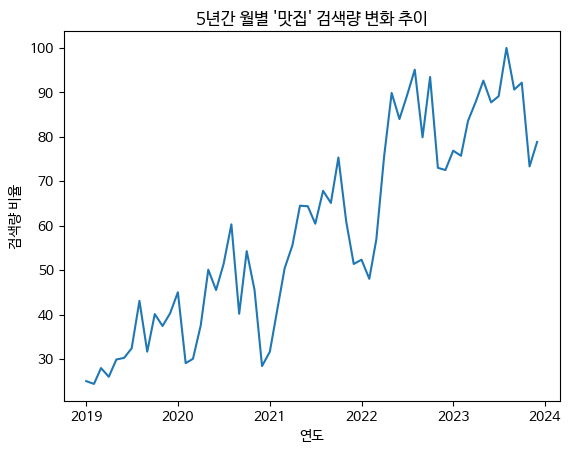

In [96]:
sns.lineplot(data=restaurant_df, x="date", y="restaurant")
plt.xlabel("연도")
plt.ylabel("검색량 비율")
plt.title("5년간 월별 '맛집' 검색량 변화 추이")
plt.show()

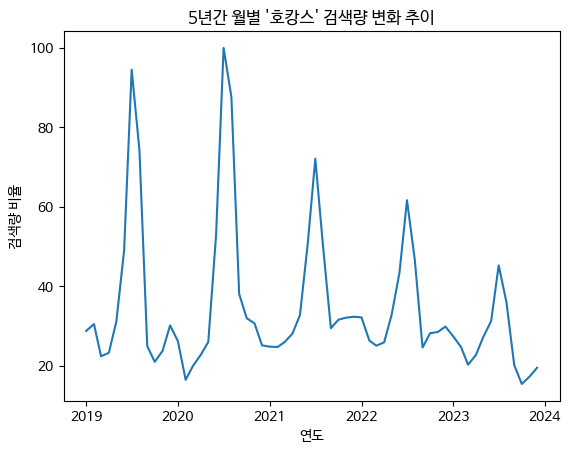

In [97]:
sns.lineplot(data=hocance_df, x="date", y="hocance")
plt.xlabel("연도")
plt.ylabel("검색량 비율")
plt.title("5년간 월별 '호캉스' 검색량 변화 추이")
plt.show()

In [98]:
hocance_df['month'] = hocance_df['date'].dt.month


/tmp/ipykernel_18543/1448295705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hocance_df['month'] = hocance_df['date'].dt.month


In [99]:
pivot_hocance

,hocance
month,
1,27.872714
2,24.551678
3,22.723496
4,24.522690
5,30.000652
6,45.468734
7,74.719676
8,58.901766
9,27.432634


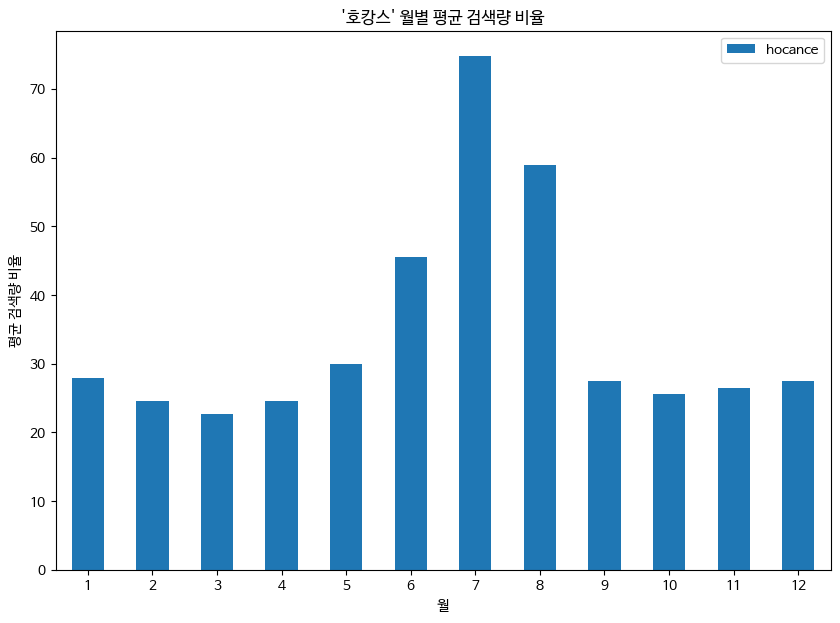

In [100]:
pivot_hocance = pd.pivot_table(hocance_df, index = 'month',values='hocance',aggfunc='mean')
# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = pivot_hocance.plot(kind='bar',  figsize=(10, 7))
plt.title("'호캉스' 월별 평균 검색량 비율")
plt.xlabel('월')
plt.ylabel('평균 검색량 비율')
plt.xticks(rotation=0)

# 그래프 표시
plt.show()

In [101]:
leisure_df
leisure_df['year'] = leisure_df['date'].dt.year
leisure_df['month'] = leisure_df['date'].dt.month
leisure_df_8 = leisure_df.query("month==8")
leisure_df_8 = leisure_df_8[['year','barge','surfing','snorkeling']]

/tmp/ipykernel_18543/4247759143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leisure_df['year'] = leisure_df['date'].dt.year
/tmp/ipykernel_18543/4247759143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leisure_df['month'] = leisure_df['date'].dt.month


In [102]:
leisure_df_8 = leisure_df_8.rename(columns={'barge': '수상 레저(빠지)'})
leisure_df_8 = leisure_df_8.rename(columns={'surfing': '서핑'})
leisure_df_8 = leisure_df_8.rename(columns={'snorkeling': '스노클링'})


In [103]:
leisure_df_8['year'] = leisure_df_8['year'].astype('str')
leisure_df_8['year'] = leisure_df_8['year'] + "년"

In [104]:
pivot_leisure

,수상 레저(빠지),서핑,스노클링
year,,,
2019년년,40.00076,27.59819,36.40149
2020년년,48.34938,28.35473,31.03698
2021년년,40.55479,24.04860,37.83050
2022년년,80.65489,23.38376,84.28091
2023년년,100.00000,22.63869,66.44123


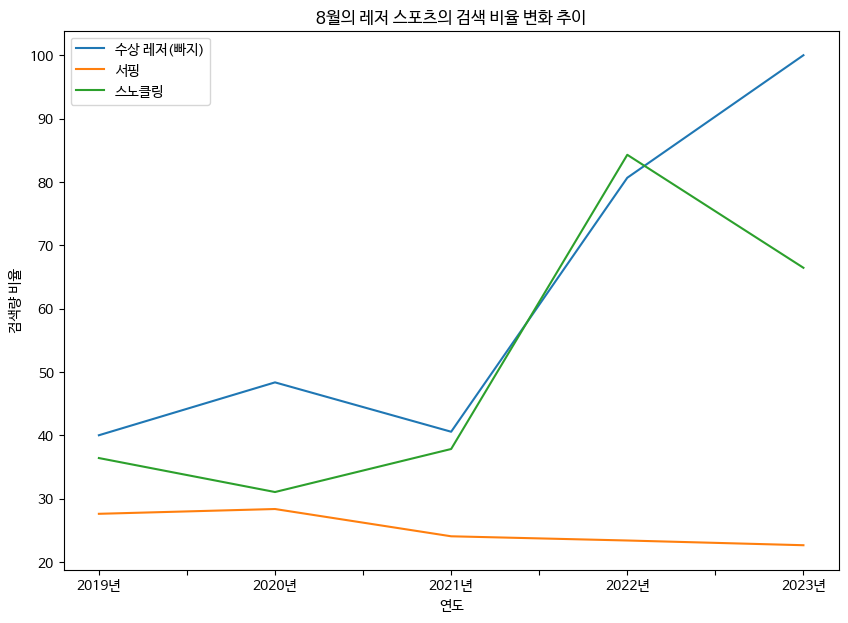

In [109]:
pivot_leisure = leisure_df_8.set_index('year')
# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = pivot_leisure.plot(kind='line',  figsize=(10, 7))
plt.title("8월의 레저 스포츠의 검색 비율 변화 추이")
plt.xlabel('연도')
plt.ylabel('검색량 비율')
plt.xticks(rotation=0)

# 그래프 표시
plt.show()

In [106]:
pivot_members_sex_accommodation = pd.pivot_table(data=df_members_sex.query("days=='숙박'"), index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex_accommodation
pivot_members_sex_accommodation = pivot_members_sex_accommodation.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
pivot_members_sex_accommodation.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 숙박 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

NameError: name 'df_members_sex' is not defined

In [107]:
pivot_members_sex_day = pd.pivot_table(data=df_members_sex.query("days=='당일'"), index='member',columns=['value'],values='visitor_ratio',aggfunc='mean')
pivot_members_sex_day
pivot_members_sex_day = pivot_members_sex_day.reindex(['1명','2~3명','4~5명','6~10명','11~20명','21명이상'])
# 선 그래프 그리기
pivot_members_sex_day.plot(kind='bar',  figsize=(10, 7))
# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title('지역별 당일 여행 횟수')
plt.xlabel('지역')
plt.ylabel('여행 횟수')

# 그래프 표시
plt.show()

NameError: name 'df_members_sex' is not defined